Demonstration of Z-transform using Python

In [2]:
import sympy as sym

In [23]:
k = sym.symbols('k', integer=True)
z = sym.symbols('z', complex=True)
y=sym.KroneckerDelta(k, 0)
X = sym.summation(y * z**(-k), (k, -sym.oo, sym.oo))
X

1

In [31]:
u_n = 1
u_n

1

In [33]:
X = sym.summation(u_n * z**(-k), (k, 0, sym.oo))
X

⎧    1           1     
⎪  ─────    for ─── < 1
⎪      1        │z│    
⎪  1 - ─               
⎪      z               
⎪                      
⎪  ∞                   
⎨ ___                  
⎪ ╲                    
⎪  ╲    -k             
⎪  ╱   z     otherwise 
⎪ ╱                    
⎪ ‾‾‾                  
⎪k = 0                 
⎩                      

In [36]:
uu=1
X = sym.summation(uu * z**(-k), (k, -sym.oo, -1))
X

⎧    z                  
⎪  ─────     for │z│ < 1
⎪  1 - z                
⎪                       
⎪  -1                   
⎪ ___                   
⎨ ╲                     
⎪  ╲     -k             
⎪  ╱    z     otherwise 
⎪ ╱                     
⎪ ‾‾‾                   
⎪k = -∞                 
⎩                       

In [4]:
z0 = sym.symbols('z0')
p=z0**k
X = sym.summation(p * z**(-k), (k, 0, sym.oo))
X

⎧     1             │z₀│    
⎪   ──────      for │──│ < 1
⎪       z₀          │z │    
⎪   1 - ──                  
⎪       z                   
⎪                           
⎪  ∞                        
⎨ ___                       
⎪ ╲                         
⎪  ╲    -k   k              
⎪  ╱   z  ⋅z₀    otherwise  
⎪ ╱                         
⎪ ‾‾‾                       
⎪k = 0                      
⎩                           

In [7]:
poles = sym.roots(sym.denom(X), z)
poles

{z₀: 1}

In [8]:
zeros = sym.roots(sym.numer(X), z)
zeros

{0: 1}

In [12]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle


def pole_zero_plot(p, z):

    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()

    for pole in p:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in z:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10, fillstyle='none')

    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.7)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')

    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.title('Poles and Zeros')
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')


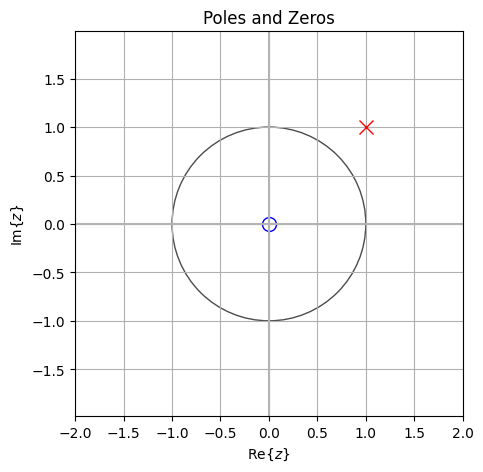

In [14]:
X2 = X.subs(z0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

In [15]:
import sympy as sym
%matplotlib inline
sym.init_printing()

z = sym.symbols('z', complex=True)
W0 = sym.symbols('Omega0', real=True)

X = z * (z - sym.cos(W0)) / (z**2 - 2*z*sym.cos(W0) + 1)
X

  z⋅(z - cos(Ω₀))   
────────────────────
 2                  
z  - 2⋅z⋅cos(Ω₀) + 1

In [16]:
poles = sym.roots(sym.denom(X), z)
poles

⎧    _____________________________                 ___________________________
⎨- ╲╱ (cos(Ω₀) - 1)⋅(cos(Ω₀) + 1)  + cos(Ω₀): 1, ╲╱ (cos(Ω₀) - 1)⋅(cos(Ω₀) + 1
⎩                                                                             

__             ⎫
)  + cos(Ω₀): 1⎬
               ⎭

In [17]:
zeros = sym.roots(sym.numer(X), z)
zeros

{0: 1, cos(Ω₀): 1}

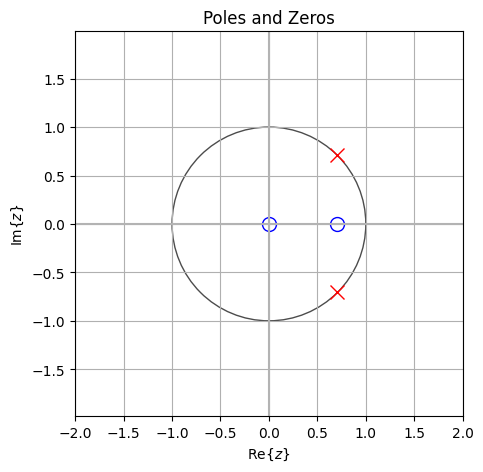

In [18]:
X2 = X.subs(W0, sym.pi/4)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

In [19]:
z0 = sym.symbols('z0', complex=True)
sym.summation(z0**k * z**(-k), (k, -sym.oo, -1))

⎧      z             │z │    
⎪─────────────   for │──│ < 1
⎪   ⎛  z     ⎞       │z₀│    
⎪z₀⋅⎜- ── + 1⎟               
⎪   ⎝  z₀    ⎠               
⎪                            
⎪  -1                        
⎨ ___                        
⎪ ╲                          
⎪  ╲     -k   k              
⎪  ╱    z  ⋅z₀    otherwise  
⎪ ╱                          
⎪ ‾‾‾                        
⎪k = -∞                      
⎩                            

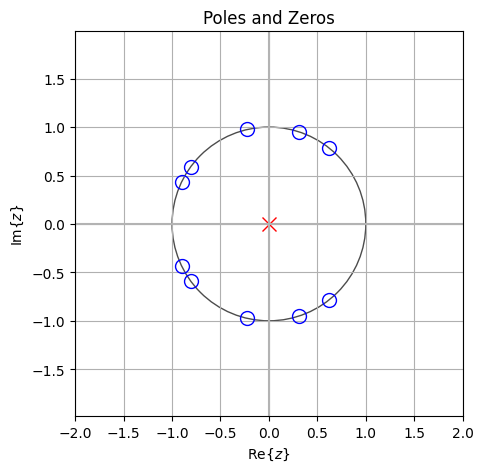

In [21]:
import sympy as sym
%matplotlib inline
sym.init_printing()

N = 5
M = 7

z = sym.symbols('z', complex=True)
k = sym.symbols('k', integer=True)

X = sym.summation(z**(-k), (k,0,N-1)) * sym.summation(z**(-k), (k,0,M-1))

poles = sym.roots(sym.denom(X) * z, z)
zeros = sym.roots(sym.numer(X) * z**(N+M-2), z)

pole_zero_plot(poles, zeros)